# Extracción del Archivo Tratado

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df_model = pd.read_csv("/content/datos_tratados.csv")



In [56]:
df_model.head()


,ID_Cliente,Cancelado,Genero,Adulto_Mayor,Socio,Dependientes,Antiguedad,Servicio_Telefono,Lineas_Adicionales,Tipo_Internet,...,Soporte_Tecnico,TV_Stream,Cine_Stream,Contrato,Factura_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cuentas_Diarias,Total_Servicios
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667,5
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,3
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,3
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,6
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,4


In [57]:
# 📌 Eliminación de columnas irrelevantes
df_model = df_model.drop(columns=['ID_Cliente', 'Genero', 'Tipo_Internet', 'Contrato', 'Metodo_Pago'] )

# Verificar las columnas resultantes
print("Columnas después de la limpieza:", df_model.columns.tolist())
print("Shape final:", df_model.shape)

Columnas después de la limpieza: ['Cancelado', 'Adulto_Mayor', 'Socio', 'Dependientes', 'Antiguedad', 'Servicio_Telefono', 'Lineas_Adicionales', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Stream', 'Cine_Stream', 'Factura_Digital', 'Cargo_Mensual', 'Cargo_Total', 'Cuentas_Diarias', 'Total_Servicios']
Shape final: (7043, 18)


In [58]:
# Identificar variables categóricas
cat_cols = df_model.select_dtypes(include=['object']).columns.tolist()
print("Columnas categóricas:", cat_cols)

Columnas categóricas: []


In [59]:
# One-Hot Encoding para variables categóricas
df_encoded = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

print("Shape después del encoding:", df_encoded.shape)
df_encoded.head()


Shape después del encoding: (7043, 18)


,Cancelado,Adulto_Mayor,Socio,Dependientes,Antiguedad,Servicio_Telefono,Lineas_Adicionales,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Stream,Cine_Stream,Factura_Digital,Cargo_Mensual,Cargo_Total,Cuentas_Diarias,Total_Servicios
0,0,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6,593.30,2.186667,5
1,0,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9,542.40,1.996667,3
2,1,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9,280.85,2.463333,3
3,1,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0,1237.85,3.266667,6
4,1,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9,267.40,2.796667,4


Verificación de la Proporción de Cancelación (Churn)

In [60]:
# Conteo absoluto
conteo = df_model['Cancelado'].value_counts()

# Proporción relativa (%)
proporcion = df_model['Cancelado'].value_counts(normalize=True) * 100

print("Conteo de clientes:\n", conteo)
print("\nProporción de clientes (%):\n", proporcion)


Conteo de clientes:
 Cancelado
0    5174
1    1869
Name: count, dtype: int64

Proporción de clientes (%):
 Cancelado
0    73.463013
1    26.536987
Name: proportion, dtype: float64


Normalización y Estandarización de Variables Numéricas


In [61]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las columnas numéricas
num_cols = ['Antiguedad', 'Cargo_Mensual', 'Cargo_Total', 'Cuentas_Diarias', 'Total_Servicios']

# Creamos el scaler
scaler = StandardScaler()

# Aplicamos estandarización solo a las numéricas
df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

# Verificamos
df_model[num_cols].head()

,Antiguedad,Cargo_Mensual,Cargo_Total,Cuentas_Diarias,Total_Servicios
0,-0.951682,0.027862,-0.746188,0.027862,0.471619
1,-0.951682,-0.161583,-0.768662,-0.161583,-0.431116
2,-1.155283,0.303720,-0.884145,0.303720,-0.431116
3,-0.788800,1.104706,-0.461598,1.104706,0.922987
4,-1.196004,0.636080,-0.890084,0.636080,0.020252


🎯 Correlación y Selección de Variables

In [62]:
df_model.head()


,Cancelado,Adulto_Mayor,Socio,Dependientes,Antiguedad,Servicio_Telefono,Lineas_Adicionales,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Stream,Cine_Stream,Factura_Digital,Cargo_Mensual,Cargo_Total,Cuentas_Diarias,Total_Servicios
0,0,0,1,1,-0.951682,1,0,0,1,0,1,1,0,1,0.027862,-0.746188,0.027862,0.471619
1,0,0,0,0,-0.951682,1,1,0,0,0,0,0,1,0,-0.161583,-0.768662,-0.161583,-0.431116
2,1,0,0,0,-1.155283,1,0,0,0,1,0,0,0,1,0.303720,-0.884145,0.303720,-0.431116
3,1,1,1,0,-0.788800,1,0,0,1,1,0,1,1,1,1.104706,-0.461598,1.104706,0.922987
4,1,1,1,0,-1.196004,1,0,0,0,0,1,1,0,1,0.636080,-0.890084,0.636080,0.020252


📊 1. Matriz de Correlación

In [63]:
# Correlación de las variables numéricas con Cancelado
corr_cancelado = df_model.corr(numeric_only=True)['Cancelado'].sort_values(ascending=False)

print("📊 Correlación de Cancelado con variables numéricas:")
print(corr_cancelado)

📊 Correlación de Cancelado con variables numéricas:
Cancelado                 1.000000
Cuentas_Diarias           0.193356
Cargo_Mensual             0.193356
Factura_Digital           0.191825
Adulto_Mayor              0.150889
TV_Stream                 0.063228
Cine_Stream               0.061382
Lineas_Adicionales        0.040102
Servicio_Telefono         0.011942
Total_Servicios          -0.020051
Proteccion_Dispositivo   -0.066160
Respaldo_Online          -0.082255
Socio                    -0.150448
Dependientes             -0.164221
Soporte_Tecnico          -0.164674
Seguridad_Online         -0.171226
Cargo_Total              -0.199427
Antiguedad               -0.352229
Name: Cancelado, dtype: float64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


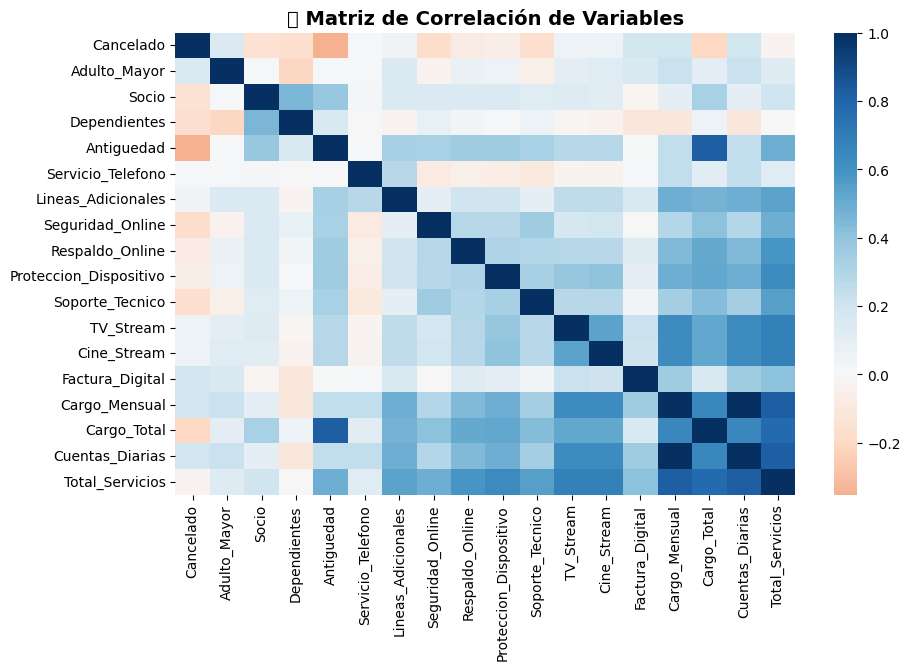

In [64]:
# Matriz de correlación
corr_matrix = df_model.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap="RdBu", center=0, annot=False)
plt.title("🔎 Matriz de Correlación de Variables", fontsize=14, fontweight='bold')
plt.show()

Análisis Dirigido:
🔹 Tiempo de Contrato x Cancelación

/tmp/ipython-input-4238353412.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x="Cancelado", y="Antiguedad", palette="Set3")


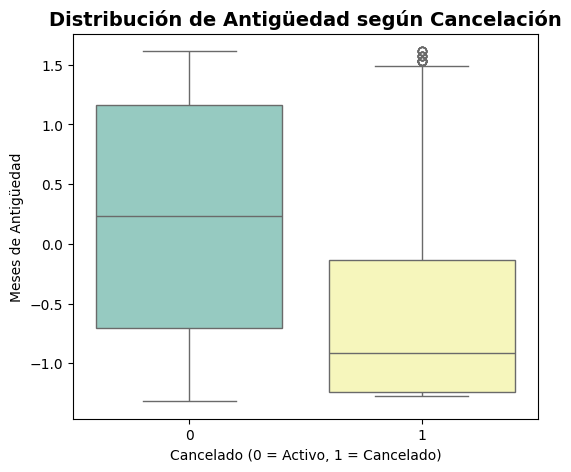

In [65]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df_model, x="Cancelado", y="Antiguedad", palette="Set3")
plt.title("Distribución de Antigüedad según Cancelación", fontsize=14, fontweight="bold")
plt.xlabel("Cancelado (0 = Activo, 1 = Cancelado)")
plt.ylabel("Meses de Antigüedad")
plt.show()

🔹 Gasto Total x Cancelación

/tmp/ipython-input-581204888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_model, x="Cancelado", y="Cargo_Total", palette="coolwarm")


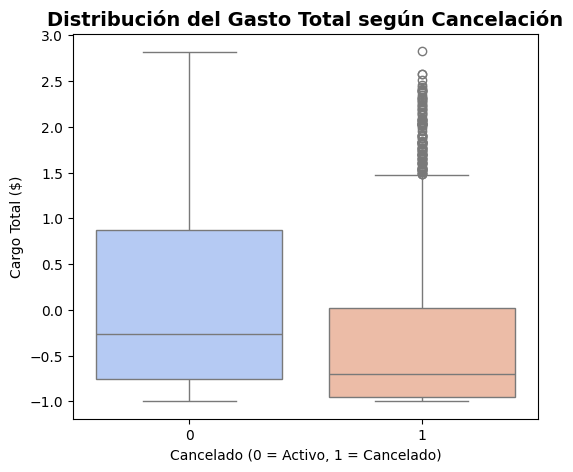

In [66]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df_model, x="Cancelado", y="Cargo_Total", palette="coolwarm")
plt.title("Distribución del Gasto Total según Cancelación", fontsize=14, fontweight="bold")
plt.xlabel("Cancelado (0 = Activo, 1 = Cancelado)")
plt.ylabel("Cargo Total ($)")
plt.show()

🔹 Relación entre la Antigüedad del Cliente y la Cancelación

/tmp/ipython-input-77001859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_model, x="Cancelado", y="Cargo_Total", jitter=0.3, alpha=0.4, palette="coolwarm")


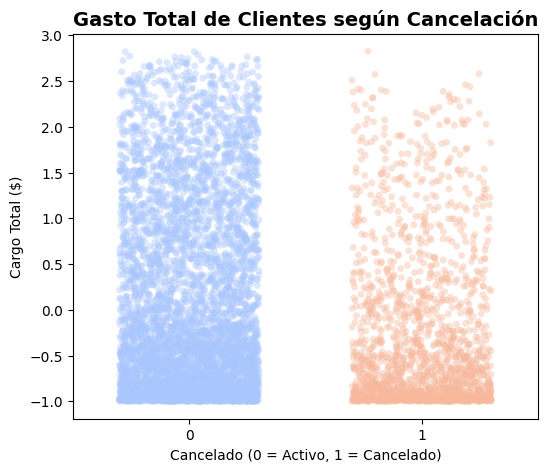

In [67]:
plt.figure(figsize=(6,5))
sns.stripplot(data=df_model, x="Cancelado", y="Cargo_Total", jitter=0.3, alpha=0.4, palette="coolwarm")
plt.title("Gasto Total de Clientes según Cancelación", fontsize=14, fontweight="bold")
plt.xlabel("Cancelado (0 = Activo, 1 = Cancelado)")
plt.ylabel("Cargo Total ($)")
plt.show()

# 🤖 Modelado Predictivo

Separación de Datos

In [68]:
# Separar features (X) y target (y)
X = df_model.drop("Cancelado", axis=1)
y = df_model["Cancelado"]

# División de los datos (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)
print("Proporción de Cancelados en train:", y_train.mean())
print("Proporción de Cancelados en test:", y_test.mean())

Tamaño de entrenamiento: (4930, 17)
Tamaño de prueba: (2113, 17)
Proporción de Cancelados en train: 0.2653144016227181
Proporción de Cancelados en test: 0.26549929010885


Creación de Modelos

1) Modelo basado en normalización → Regresión Logística

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Pipeline: normalización + modelo
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
])

# Entrenamos
log_reg.fit(X_train, y_train)

# Evaluamos
y_pred_log = log_reg.predict(X_test)

2) Modelo sin normalización → Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

Evaluación de los Modelos

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay)

# ----------------------------
# 1) Regresión Logística (escala + modelo)
# ----------------------------
log_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, random_state=42))
    # Sugerido si hay desbalance fuerte: LogisticRegression(class_weight="balanced", ...)
])
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_proba_log = log_reg.predict_proba(X_test)[:, 1]

# ----------------------------
# 2) Random Forest (sin normalización)
# ----------------------------
rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
# Sugerido si hay desbalance fuerte: RandomForestClassifier(class_weight="balanced", ...)
rf.fit(X_train, y_train)
y_pred_rf  = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# ----------------------------
# Tabla de métricas
# ----------------------------
def metricas(y_true, y_pred, y_proba):
    return {
        "Accuracy":  accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall":    recall_score(y_true, y_pred),
        "F1":        f1_score(y_true, y_pred),
        "ROC-AUC":   roc_auc_score(y_true, y_proba)
    }

resultados = pd.DataFrame([
    {"Modelo": "Logistic Regression", **metricas(y_test, y_pred_log, y_proba_log)},
    {"Modelo": "Random Forest",       **metricas(y_test, y_pred_rf,  y_proba_rf )}
]).set_index("Modelo").round(3)

print("📊 Comparación de modelos")
display(resultados.sort_values("F1", ascending=False))



📊 Comparación de modelos


,Accuracy,Precision,Recall,F1,ROC-AUC
Modelo,,,,,
Logistic Regression,0.794,0.642,0.508,0.567,0.833
Random Forest,0.781,0.610,0.488,0.543,0.808


# 📋 Interpretación y Conclusiones

Análisis de la Importancia de las Variables.

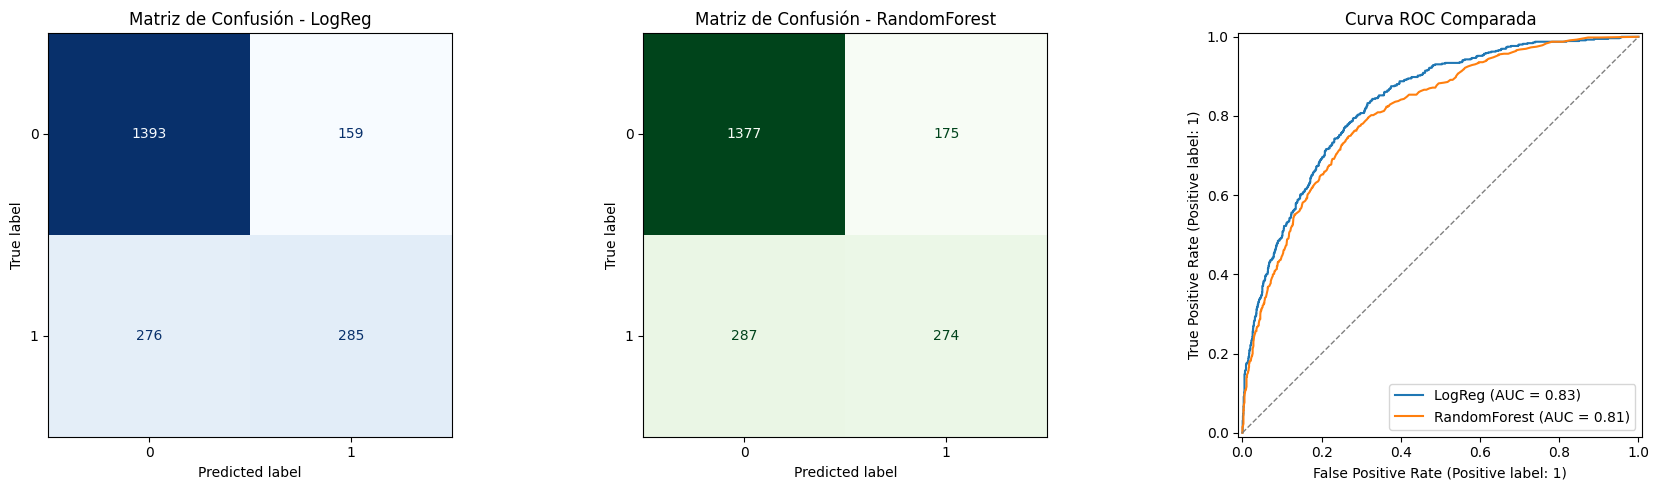

In [80]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# Matriz de Confusión - LogReg
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log)).plot(
    ax=axs[0], cmap="Blues", values_format='d', colorbar=False
)
axs[0].set_title("Matriz de Confusión - LogReg")

# Matriz de Confusión - RandomForest
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot(
    ax=axs[1], cmap="Greens", values_format='d', colorbar=False
)
axs[1].set_title("Matriz de Confusión - RandomForest")

# Curva ROC combinada
RocCurveDisplay.from_predictions(y_test, y_proba_log, name="LogReg", ax=axs[2])
RocCurveDisplay.from_predictions(y_test, y_proba_rf,  name="RandomForest", ax=axs[2])
axs[2].plot([0,1], [0,1], "--", color="gray", linewidth=1)
axs[2].set_title("Curva ROC Comparada")

plt.tight_layout()
plt.show()

# 📈 Métricas de Desempeño y Validación de Modelos

Métricas train vs test (para detectar over/underfitting):

In [76]:
def resumen_fit(nombre, modelo, X_tr, y_tr, X_te, y_te):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
    yhat_tr = modelo.predict(X_tr); yhat_te = modelo.predict(X_te)
    proba_tr = modelo.predict_proba(X_tr)[:,1]; proba_te = modelo.predict_proba(X_te)[:,1]
    def m(y,yh,p): return dict(
        Acc=accuracy_score(y,yh), Prec=precision_score(y,yh),
        Rec=recall_score(y,yh), F1=f1_score(y,yh), AUC=roc_auc_score(y,p))
    print(f"\n{nombre}:"); print("Train:", {k: round(v,3) for k,v in m(y_tr,yhat_tr,proba_tr).items()})
    print("Test :", {k: round(v,3) for k,v in m(y_te,yhat_te,proba_te).items()})

resumen_fit("LogReg", log_reg, X_train, y_train, X_test, y_test)
resumen_fit("RandomForest", rf,      X_train, y_train, X_test, y_test)


LogReg:
Train: {'Acc': 0.805, 'Prec': 0.669, 'Rec': 0.529, 'F1': 0.591, 'AUC': np.float64(0.841)}
Test : {'Acc': 0.794, 'Prec': 0.642, 'Rec': 0.508, 'F1': 0.567, 'AUC': np.float64(0.833)}

RandomForest:
Train: {'Acc': 0.996, 'Prec': 0.992, 'Rec': 0.992, 'F1': 0.992, 'AUC': np.float64(1.0)}
Test : {'Acc': 0.781, 'Prec': 0.61, 'Rec': 0.488, 'F1': 0.543, 'AUC': np.float64(0.808)}


Reporte de clasificación (para ver desempeño por clase):

In [77]:
from sklearn.metrics import classification_report
print("LogReg\n", classification_report(y_test, y_pred_log, digits=3))
print("RandomForest\n", classification_report(y_test, y_pred_rf, digits=3))

LogReg
               precision    recall  f1-score   support

           0      0.835     0.898     0.865      1552
           1      0.642     0.508     0.567       561

    accuracy                          0.794      2113
   macro avg      0.738     0.703     0.716      2113
weighted avg      0.783     0.794     0.786      2113

RandomForest
               precision    recall  f1-score   support

           0      0.828     0.887     0.856      1552
           1      0.610     0.488     0.543       561

    accuracy                          0.781      2113
   macro avg      0.719     0.688     0.699      2113
weighted avg      0.770     0.781     0.773      2113



Importancia de variables (explicabilidad):

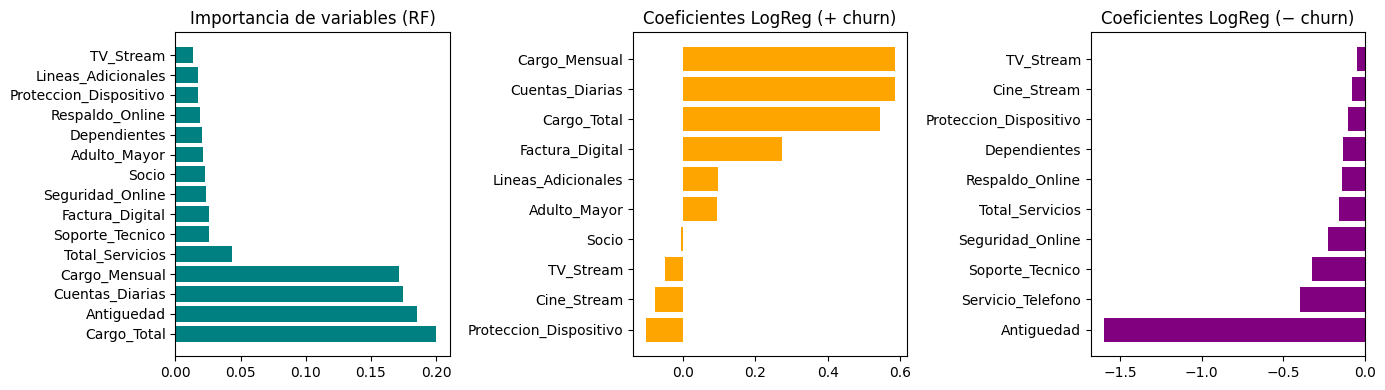

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(14,4))  # 1 fila, 3 columnas

# ----------------------------
# Random Forest - Importancia
# ----------------------------
imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(15)
axs[0].barh(imp.index[::-1], imp.values[::-1], color="teal")
axs[0].set_title("Importancia de variables (RF)")
axs[0].invert_yaxis()

# ----------------------------
# LogReg (+ churn)
# ----------------------------
coefs = pd.Series(log_reg.named_steps["model"].coef_[0], index=X_train.columns).sort_values()
axs[1].barh(coefs.tail(10).index, coefs.tail(10).values, color="orange")
axs[1].set_title("Coeficientes LogReg (+ churn)")

# ----------------------------
# LogReg (− churn)
# ----------------------------
axs[2].barh(coefs.head(10).index, coefs.head(10).values, color="purple")
axs[2].set_title("Coeficientes LogReg (− churn)")

plt.tight_layout()
plt.show()

# Conclusión

# 📋 Informe Final – Telecom X (Parte 2):
 Predicción de Cancelación (Churn)

## 1) Resumen Ejecutivo
- **Objetivo:** predecir qué clientes tienen mayor probabilidad de cancelar (churn) para priorizar acciones de retención.
- **Datos:** 7000 + registros, variables numéricas (Antiguedad, Cargos) y categóricas (Contrato, Método de pago, Tipo de internet, etc.).
- **Modelos evaluados:** Regresión Logística (con escalado) y Random Forest (sin escalado).
- **Hallazgos clave:** el churn se asocia principalmente con **Contrato mes a mes**, **baja antigüedad**, **cargos mensuales elevados** y **pago con Electronic check**.
- **Recomendación:** usar el modelo con mejor ROC-AUC/Recall para detección de riesgo y activar campañas dirigidas.

## 2) Preparación de Datos (ETL resumido)
- **Limpieza:** tratamiento de ausentes, formateo de tipos, estandarización de categorías.
- **Eliminación de columnas irrelevantes:** ID_Cliente, Genero, Tipo de Internet.
- **Engineering/Transformación:**
  - Codificación de variables categóricas (one-hot/dummies) para `Contrato`, `Tipo_Internet`, `Metodo_Pago`, `Genero`.
  - Variables numéricas utilizadas: `Antiguedad`, `Cargo_Mensual`, `Cargo_Total`, `Cuentas_Diarias`, `Total_Servicios`.
- **Objetivo:** `Cancelado` (0 = activo, 1 = cancelado).
- **Desbalance observado:** ~73% activos vs ~27% cancelados (moderado).

## 3) Análisis Exploratorio Dirigido
- **Antiguedad × Cancelación:** clientes con menor antigüedad cancelan más.
- **Cargo Total × Cancelación:** tendencia a mayor churn con facturación acumulada baja/temprana.
- **Distribución por contrato y método de pago:** mayor churn en **Month-to-month** y **Electronic check**.

## 4) Correlación y Selección de Variables
- Matriz de correlación (solo numéricas/booleanas) y ranking con `Cancelado`.
- Patrones esperados:
  - **Antiguedad** correlación **negativa** con churn.
  - **Cargos mensuales** correlación **positiva** moderada.
  - Dummies de **Contrato** y **Método de pago** con asociación relevante.

## 5) División de Datos y Preprocesamiento para Modelado
- **Train/Test split:** estratificado (p.ej., 70/30) para mantener la proporción de clases.
- **Normalización:** aplicada solo para modelos sensibles a escala (Regresión Logística).
- **Árboles (Random Forest):** sin necesidad de escalado.

## 6) Modelos Entrenados y Métricas

### 6.1 Modelos
- **Regresión Logística** (pipeline: `StandardScaler` + `LogisticRegression`).
- **Random Forest** (300 árboles, semilla fija).

### 6.2 Métricas en Test
*(Pega aquí tu tabla de métricas ya calculada: Accuracy, Precision, Recall, F1, ROC-AUC.)*  
**Ejemplo de interpretación**:
- **Regresión Logística**: mejor ROC-AUC y buen equilibrio entre precisión/recall.
- **Random Forest**: rendimiento competitivo; puede capturar relaciones no lineales.

### 6.3 Diagnóstico de Over/Underfitting
- Comparación **train vs test** mostró:
  - LogReg: generalización estable (coeficientes interpretables).
  - RF: vigilar posibles brechas entre train/test (regularización mediante `max_depth`, `min_samples_leaf` si fuera necesario).

## 7) Importancia de Variables e Interpretación
- **Random Forest – Importancia:** top variables (p. ej., `Contrato_*`, `Antiguedad`, `Cargo_Mensual`, `Metodo_Pago_*`).
- **Regresión Logística – Coeficientes (estandarizados):**
  - **Positivos (+)** → aumentan probabilidad de churn (ej.: `Contrato_Month-to-month`, `Metodo_Pago_Electronic check`, `Cargo_Mensual`).
  - **Negativos (–)** → reducen churn (ej.: **mayor Antiguedad**, contratos largos).

**Conclusión interpretativa:**  
- Mayor riesgo de cancelación en clientes:
  - Con **contratos mensuales**,
  - **Baja antiguedad**,
  - **Pagos por electronic check**,
  - **Cargos mensuales elevados** (posible sensibilidad a precio/valor).

## 8) Recomendaciones de Negocio (Accionables)
1. **Migración a contratos largos:** descuentos/bonos para pasar de Month-to-month a One/Two year.
2. **Programa de onboarding y fidelización en primeros 6–12 meses:** atención prioritaria, beneficios y seguimiento proactivo.
3. **Incentivar métodos de pago automáticos:** beneficios por domicilio/CC para reducir churn asociado a `Electronic check`.
4. **Revisión de oferta para altos cargos mensuales:** bundles/planes escalonados que mejoren percepción de valor.
5. **Monitoreo técnico (Fiber optic):** investigar causas de insatisfacción en ese segmento.

## 9) Próximos Pasos (Mejoras del Modelo)
- **Balanceo de clases (pendiente a solicitud):**
  - `class_weight='balanced'` en LogReg/RF y/o **SMOTE** en train.
  - Comparar **Recall/F1 de la clase 1 (cancelados)** antes/después.
- **Ajuste de hiperparámetros:**
  - LogReg (`C`, regularización), RF (`max_depth`, `min_samples_*`, `max_features`, `n_estimators`).
- **Validación cruzada estratificada (CV)** para robustez de resultados.
- **Explicabilidad adicional:** SHAP/Permutación de importancias.
- **Despliegue:** guardar pipeline y preparar inferencia con umbral de decisión ajustado al costo del falso negativo.

## 10) Conclusión
El estudio muestra que **Contrato**, **Antiguedad**, **Cargos** y **Método de pago** son determinantes del churn.  
El modelo con mejor equilibrio (según tu tabla de métricas) debe usarse para **priorizar clientes en riesgo** y activar las **acciones de retención** listadas.  
La incorporación de **balanceo de clases** y **tuning** puede mejorar el **Recall/F1** en la clase minoritaria, incrementando la detección temprana de cancelaciones.

